In [2]:
import serial
import time

# Configure the serial connections
# You might need to change the COM port name and the baud rate
ser = serial.Serial(
    port='COM3',
    baudrate=115200,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    bytesize=serial.EIGHTBITS,
    timeout=2  # Timeout for read operation, in seconds
)

# Main loop to read data from the COM port
try:
    while True:
        if ser.in_waiting >= 4:  # Check if at least 4 bytes are in the buffer
            # Read 4 bytes from the serial port
            data = ser.read(4)
            # Convert bytes to uint32_t (adjust 'little' or 'big' based on your device)
            number = int.from_bytes(data, byteorder='little', signed=False)
            print(f"ADC value received: {number}")

except KeyboardInterrupt:
    print("Exiting program")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    ser.close()
    print("Serial connection closed")



ADC value received: 76
ADC value received: 89
ADC value received: 79
ADC value received: 28
ADC value received: 33
ADC value received: 45
ADC value received: 81
ADC value received: 34
ADC value received: 70
ADC value received: 24
ADC value received: 74
ADC value received: 37
ADC value received: 43
ADC value received: 77
ADC value received: 40
ADC value received: 76
ADC value received: 24
ADC value received: 71
ADC value received: 47
ADC value received: 68
ADC value received: 66
ADC value received: 64
ADC value received: 22
ADC value received: 35
ADC value received: 61
ADC value received: 30
ADC value received: 11
ADC value received: 6
ADC value received: 43
ADC value received: 90
ADC value received: 32
ADC value received: 196
ADC value received: 237
ADC value received: 237
ADC value received: 226
ADC value received: 155
ADC value received: 234
ADC value received: 234
ADC value received: 219
ADC value received: 133
ADC value received: 227
ADC value received: 167
ADC value received: 221


ADC value received: 154
ADC value received: 139
ADC value received: 141
ADC value received: 129
ADC value received: 157
ADC value received: 141
ADC value received: 125
ADC value received: 133
ADC value received: 154
ADC value received: 167
ADC value received: 200
ADC value received: 156
ADC value received: 50
ADC value received: 2
ADC value received: 6
ADC value received: 9
ADC value received: 21
ADC value received: 64
ADC value received: 64
ADC value received: 65
ADC value received: 24
ADC value received: 30
ADC value received: 74
ADC value received: 72
ADC value received: 78
ADC value received: 85
ADC value received: 81
ADC value received: 43
ADC value received: 89
ADC value received: 78
ADC value received: 41
ADC value received: 82
ADC value received: 89
ADC value received: 93
ADC value received: 88
ADC value received: 84
ADC value received: 85
ADC value received: 35
ADC value received: 83
ADC value received: 87
ADC value received: 88
ADC value received: 90
ADC value received: 93
AD

ADC value received: 41
ADC value received: 85
ADC value received: 86
ADC value received: 93
ADC value received: 85
ADC value received: 55
ADC value received: 39
ADC value received: 60
ADC value received: 37
ADC value received: 42
ADC value received: 41
ADC value received: 91
ADC value received: 88
ADC value received: 96
ADC value received: 90
ADC value received: 32
ADC value received: 42
ADC value received: 37
ADC value received: 87
ADC value received: 91
ADC value received: 91
ADC value received: 37
Exiting program
Serial connection closed


<IPython.core.display.Javascript object>


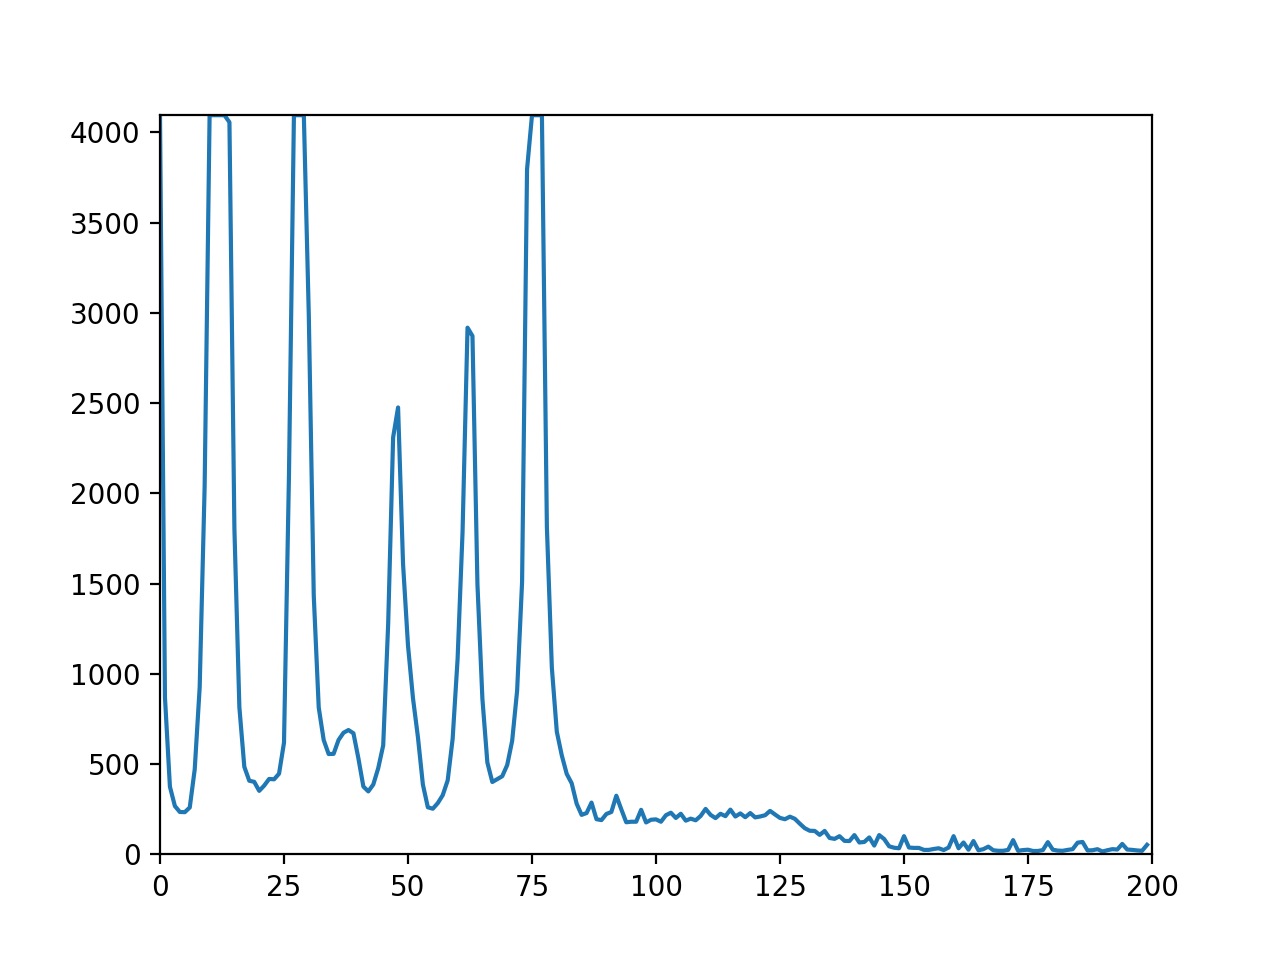

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_140108\3474680403.py:54: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=100, blit=True)


In [3]:
import threading
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
%matplotlib notebook

# Set up the serial port (for example, COM3, 9600 baud rate)
ser = serial.Serial('COM3', 115200, timeout=1)

# Deque for storing data points
data_points = deque(maxlen=200)
data_lock = threading.Lock()  # Thread lock for safe data access

def read_from_port(ser):
    try:
        while True:
            if ser.in_waiting >= 4:
                data = ser.read(4)
                number = int.from_bytes(data, byteorder='little', signed=False)
                with data_lock:  # Acquire lock to update data_points
                    data_points.append(number)
    except KeyboardInterrupt:
        print("Exiting program")
        
    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        ser.close()
        print("Serial connection closed")

def animate(i):
    with data_lock:
        if data_points:
            line.set_data(range(len(data_points)), list(data_points))
            ax.relim()  # Recalculate limits
            ax.autoscale_view()  # Auto-scale
        print(data_points)
    return line,

# Set up the plot
fig, ax = plt.subplots()
line, = ax.plot(data_points)
ax.set_xlim(0, 200)
ax.set_ylim(0, 4095)  # Adjust based on your ADC resolution

# Start the thread for reading serial data
thread = threading.Thread(target=read_from_port, args=(ser,))
thread.daemon = True
thread.start()

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, interval=100, blit=True)

plt.show()